# Routing

Optical and high speed RF ports have an orientation that routes need to follow to avoid sharp turns that produce reflections.

we have routing functions that route:

- single route between 2 ports
    - `route_single`
    - `route_single_from_steps`
- group of routes between 2 groups of ports using a bundle/river/bus router. At the moment it works only when all ports on each group have the same orientation.
    - `route_bundle`
    - `route_bundle_from_steps`


The most useful function is `route_bundle` which supports both single and groups of routes, and can also route with length matching, which ensures that all routes have the same length.

The biggest limitation is that it requires to have all the ports with the same orientation, for that you can use `gf.routing.route_ports_to_side`

In [1]:
import gdsfactory as gf
from gdsfactory.component import Component
from gdsfactory.port import Port

2025-03-27 14:21:57.157 | INFO     | kfactory.kcell:show:3385 - klive v0.3.3: Opened file '/home/nynra/repos/pytools-lithography/pytools-litho-design/build/gds/91675170.oas'
2025-03-27 14:35:23.514 | INFO     | kfactory.kcell:show:3385 - klive v0.3.3: Opened file '/home/nynra/repos/pytools-lithography/pytools-litho-design/build/gds/983173834.oas'


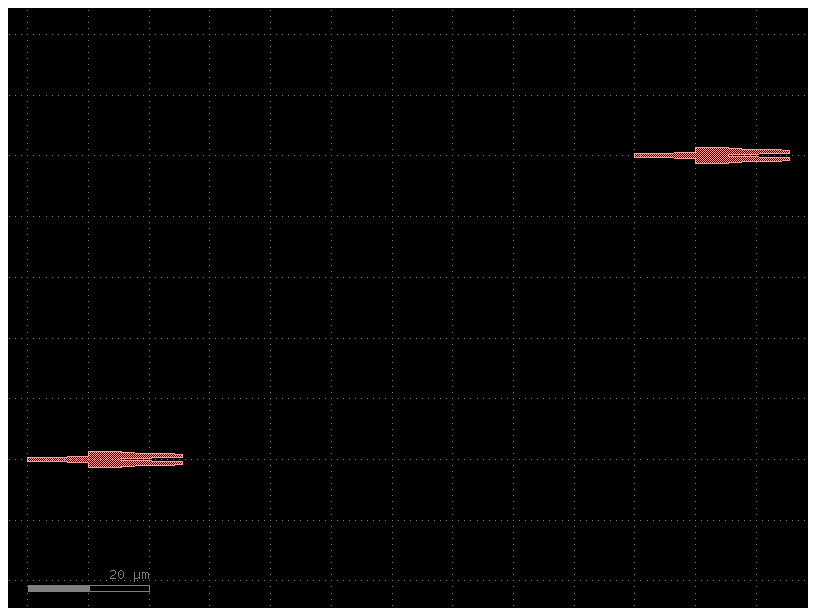

In [2]:
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.dmove((100, 50))
c

## route_single

`route_single` returns a Manhattan route between 2 ports

In [3]:
help(gf.routing.route_single)

Help on function route_single in module gdsfactory.routing.route_single:

route_single(component: 'Component', port1: 'Port', port2: 'Port', cross_section: 'CrossSectionSpec | None' = None, layer: 'LayerSpec | None' = None, bend: 'ComponentSpec' = 'bend_euler', straight: 'ComponentSpec' = 'straight', start_straight_length: 'float' = 0.0, end_straight_length: 'float' = 0.0, waypoints: 'WayPoints | None' = None, steps: "Sequence[Mapping[Literal['x', 'y', 'dx', 'dy'], int | float]] | None" = None, port_type: 'str | None' = None, allow_width_mismatch: 'bool' = False, radius: 'float | None' = None, route_width: 'float | None' = None, auto_taper: 'bool' = True) -> 'ManhattanRoute'
    Returns a Manhattan Route between 2 ports.

    The references are straights, bends and tapers.

    Args:
        component: to place the route into.
        port1: start port.
        port2: end port.
        cross_section: spec.
        layer: layer spec.
        bend: bend spec.
        straight: straight s

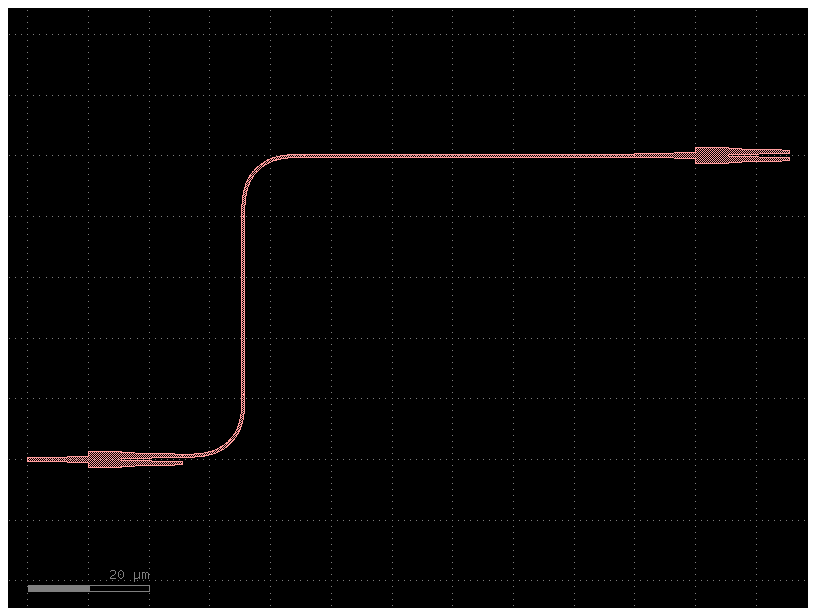

In [5]:
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.dmove((100, 50))
route = gf.routing.route_single(c, port1=mmi1.ports["o2"], port2=mmi2.ports["o1"], cross_section=gf.cross_section.strip,)
c

In [6]:
route

ManhattanRoute(backbone=[15500,625, 25500,625, 25500,50000, 90000,50000], start_port=Port(self.name=None, self.width=500, trans=r180 *1 15.5,0.625, layer=WG (1/0), port_type=optical), end_port=Port(self.name=None, self.width=500, trans=r0 *1 90,50, layer=WG (1/0), port_type=optical), instances=[Unnamed_6: ports ['o1', 'o2'], KCell(name=bend_euler_R10_A90_P0p5_2f1f5c6d, ports=['o1', 'o2'], instances=[], locked=True, kcl=DEFAULT), Unnamed_6: ports ['o1', 'o2'], KCell(name=straight_L29p375_N2_CSs_6ed2bfdd, ports=['o1', 'o2'], instances=[], locked=True, kcl=DEFAULT), Unnamed_6: ports ['o1', 'o2'], KCell(name=bend_euler_R10_A90_P0p5_2f1f5c6d, ports=['o1', 'o2'], instances=[], locked=True, kcl=DEFAULT), Unnamed_6: ports ['o1', 'o2'], KCell(name=straight_L54p5_N2_CSstrip_WNone, ports=['o1', 'o2'], instances=[], locked=True, kcl=DEFAULT)], n_bend90=2, n_taper=0, bend90_radius=10000, taper_length=0, length=83875, length_straights=83875, polygons={})

**Problem**: route_single with obstacles

sometimes there are obstacles that connect strip does not see!

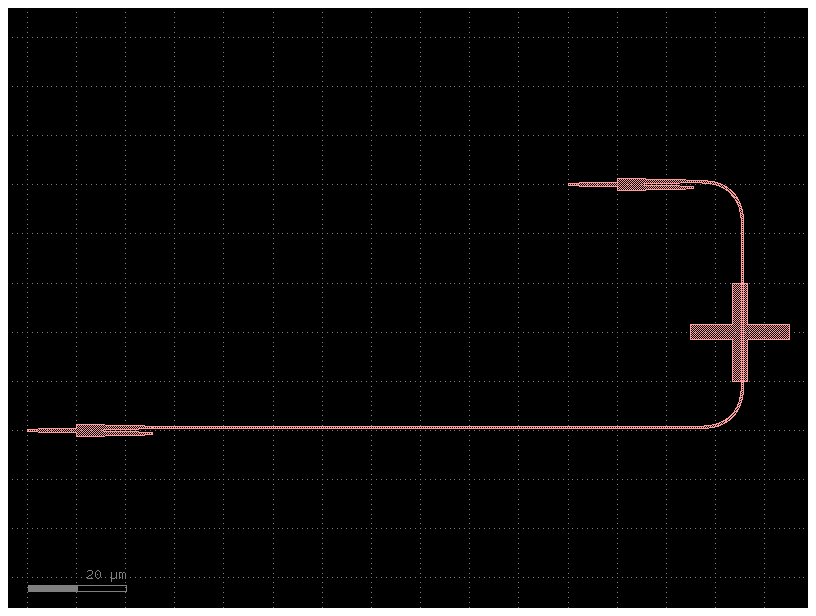

In [8]:
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.dmove((110, 50))
x = c << gf.components.cross(length=20)
x.dmove((135, 20))
route = gf.routing.route_single(c, mmi1.ports["o2"], mmi2.ports["o2"], cross_section=gf.cross_section.strip)
c

**Solutions:**

- specify the route steps

## route_single_from_steps

`route_single_from_steps` is a manual version of `route_single` where you can define only the new steps `x` or `y` together with increments `dx` or `dy`

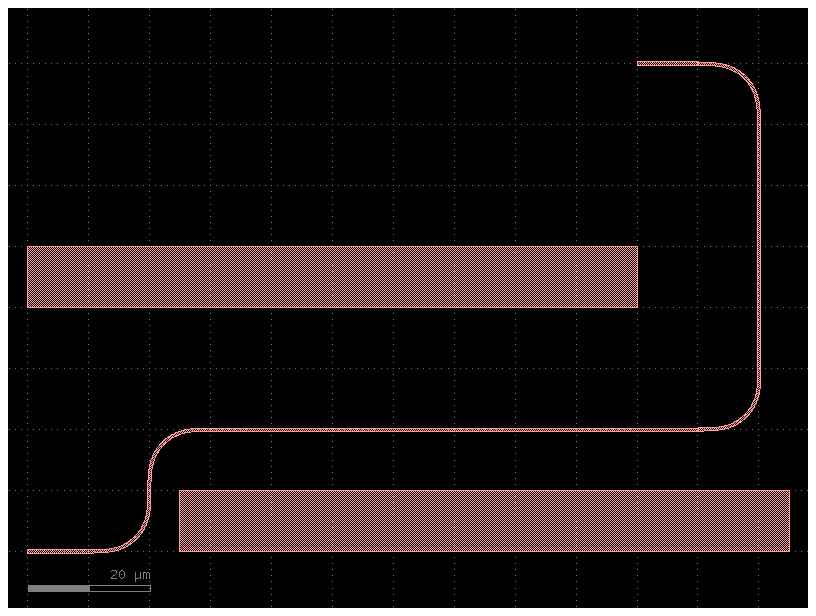

In [10]:
c = gf.Component()
w = gf.components.straight()
left = c << w
right = c << w
right.dmove((100, 80))

obstacle = gf.components.rectangle(size=(100, 10))
obstacle1 = c << obstacle
obstacle2 = c << obstacle
obstacle1.dymin = 40
obstacle2.dxmin = 25

port1 = left.ports["o2"]
port2 = right.ports["o2"]

routes = gf.routing.route_single(
    c,
    port1=port1,
    port2=port2,
    cross_section=gf.cross_section.strip,
    steps=[
        {"x": 20, "y": 0},
        {"x": 20, "y": 20},
        {"x": 120, "y": 20},
        {"x": 120, "y": 80},
    ],
)
c

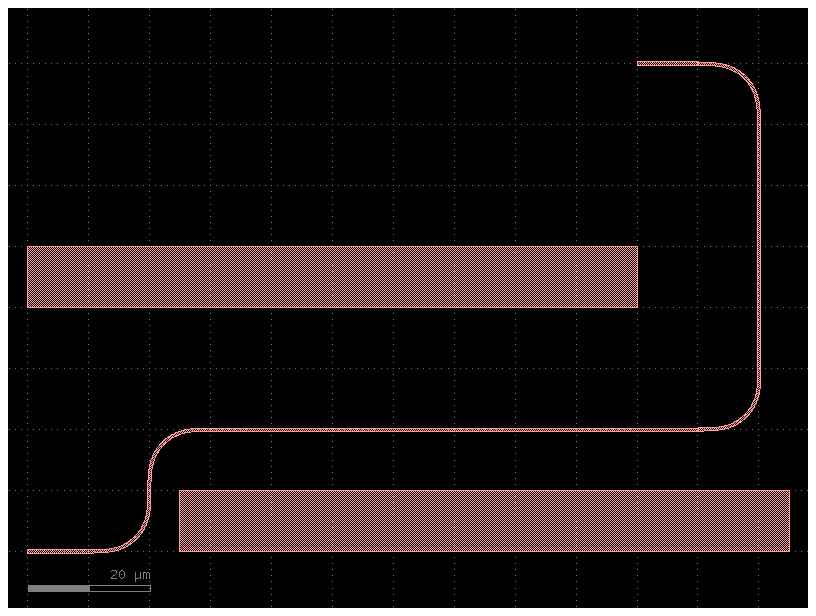

In [11]:
c = gf.Component()
w = gf.components.straight()
left = c << w
right = c << w
right.dmove((100, 80))

obstacle = gf.components.rectangle(size=(100, 10))
obstacle1 = c << obstacle
obstacle2 = c << obstacle
obstacle1.dymin = 40
obstacle2.dxmin = 25

port1 = left.ports["o2"]
port2 = right.ports["o2"]

routes = gf.routing.route_single(
    c,
    port1=port1,
    port2=port2,
    cross_section=gf.cross_section.strip,
    steps=[
        {"x": 20},
        {"y": 20},
        {"x": 120},
        {"y": 80},
    ],
)
c

## route_bundle

To route groups of ports avoiding waveguide collisions, you should use `route_bundle` instead of `route_single`.

`route_bundle` uses a river/bundle/bus router.

At the moment it works only when each group of ports have the same orientation.


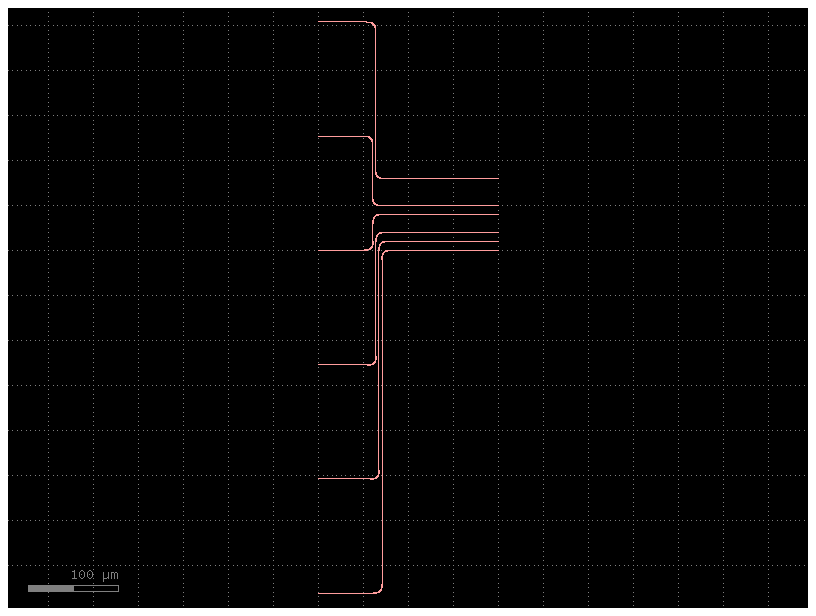

In [14]:
ys_right = [0, 10, 20, 40, 50, 80]
pitch = 127.0
N = len(ys_right)
ys_left = [(i - N / 2) * pitch for i in range(N)]
layer = 1

right_ports = [
    gf.Port(f"R_{i}", center=(0, ys_right[i]), width=0.5, orientation=180, layer=layer)
    for i in range(N)
]
left_ports = [
    gf.Port(f"L_{i}", center=(-200, ys_left[i]), width=0.5, orientation=0, layer=layer)
    for i in range(N)
]

# you can also mess up the port order and it will sort them by default
left_ports.reverse()

c = gf.Component()
routes = gf.routing.route_bundle(
    c, left_ports, right_ports, start_straight_length=50, sort_ports=True, cross_section=gf.cross_section.strip
)
c.add_ports(left_ports)
c.add_ports(right_ports)
c

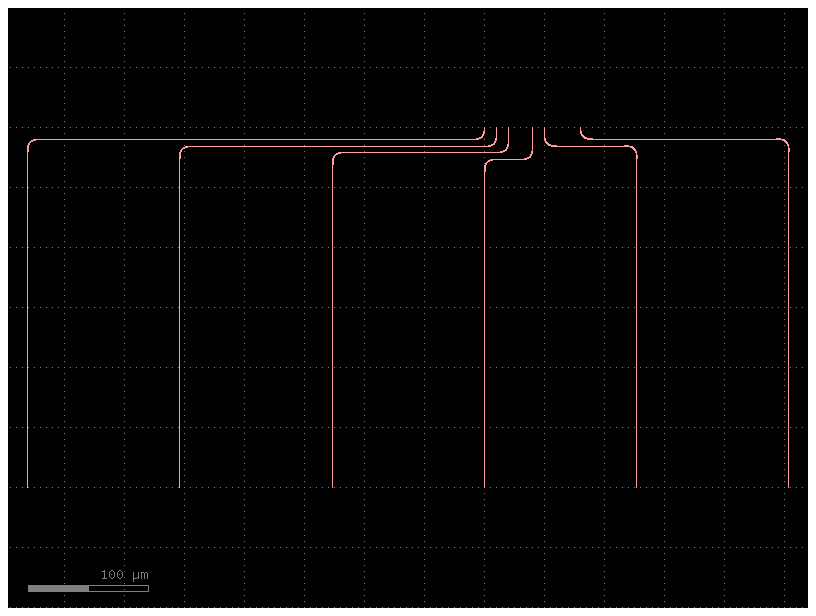

In [16]:
xs_top = [0, 10, 20, 40, 50, 80]
pitch = 127.0
N = len(xs_top)
xs_bottom = [(i - N / 2) * pitch for i in range(N)]
layer = 1

top_ports = [
    gf.Port(f"top_{i}", center=(xs_top[i], 0), width=0.5, orientation=270, layer=layer)
    for i in range(N)
]

bot_ports = [
    gf.Port(
        f"bot_{i}",
        center=(xs_bottom[i], -300),
        width=0.5,
        orientation=90,
        layer=layer,
    )
    for i in range(N)
]

c = gf.Component()
routes = gf.routing.route_bundle(
    c, top_ports, bot_ports, separation=5.0, end_straight_length=100, cross_section=gf.cross_section.strip
)
c

`route_bundle` can also route bundles through corners


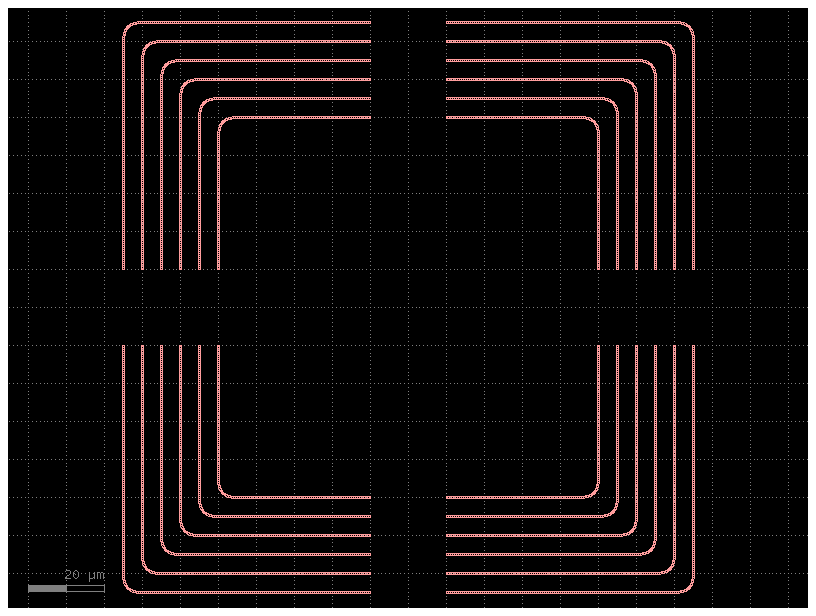

In [17]:
@gf.cell(cache={})
def test_connect_corner(N=6, config="A"):
    d = 10.0
    sep = 5.0
    c = gf.Component()
    layer = 1

    if config in ["A", "B"]:
        a = 100.0
        ports_A_TR = [
            Port(
                f"A_TR_{i}",
                center=(d, a / 2 + i * sep),
                width=0.5,
                orientation=0,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_TL = [
            Port(
                f"A_TL_{i}",
                center=(-d, a / 2 + i * sep),
                width=0.5,
                orientation=180,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_BR = [
            Port(
                f"A_BR_{i}",
                center=(d, -a / 2 - i * sep),
                width=0.5,
                orientation=0,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_BL = [
            Port(
                f"A_BL_{i}",
                center=(-d, -a / 2 - i * sep),
                width=0.5,
                orientation=180,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A = [ports_A_TR, ports_A_TL, ports_A_BR, ports_A_BL]

        ports_B_TR = [
            Port(
                f"B_TR_{i}",
                center=(a / 2 + i * sep, d),
                width=0.5,
                orientation=90,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_TL = [
            Port(
                f"B_TL_{i}",
                center=(-a / 2 - i * sep, d),
                width=0.5,
                orientation=90,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_BR = [
            Port(
                f"B_BR_{i}",
                center=(a / 2 + i * sep, -d),
                width=0.5,
                orientation=270,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_BL = [
            Port(
                f"B_BL_{i}",
                center=(-a / 2 - i * sep, -d),
                width=0.5,
                orientation=270,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B = [ports_B_TR, ports_B_TL, ports_B_BR, ports_B_BL]

    elif config in ["C", "D"]:
        a = N * sep + 2 * d
        ports_A_TR = [
            Port(
                f"A_TR_{i}",
                center=(a, d + i * sep),
                width=0.5,
                orientation=0,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_TL = [
            Port(
                f"A_TL_{i}",
                center=(-a, d + i * sep),
                width=0.5,
                orientation=180,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_BR = [
            Port(
                f"A_BR_{i}",
                center=(a, -d - i * sep),
                width=0.5,
                orientation=0,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A_BL = [
            Port(
                f"A_BL_{i}",
                center=(-a, -d - i * sep),
                width=0.5,
                orientation=180,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_A = [ports_A_TR, ports_A_TL, ports_A_BR, ports_A_BL]

        ports_B_TR = [
            Port(
                f"B_TR_{i}",
                center=(d + i * sep, a),
                width=0.5,
                orientation=90,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_TL = [
            Port(
                f"B_TL_{i}",
                center=(-d - i * sep, a),
                width=0.5,
                orientation=90,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_BR = [
            Port(
                f"B_BR_{i}",
                center=(d + i * sep, -a),
                width=0.5,
                orientation=270,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B_BL = [
            Port(
                f"B_BL_{i}",
                center=(-d - i * sep, -a),
                width=0.5,
                orientation=270,
                layer=layer,
            )
            for i in range(N)
        ]

        ports_B = [ports_B_TR, ports_B_TL, ports_B_BR, ports_B_BL]

    if config in ["A", "C"]:
        for ports1, ports2 in zip(ports_A, ports_B):
            gf.routing.route_bundle(c, ports1, ports2, radius=5, sort_ports=True, cross_section=gf.cross_section.strip)

    elif config in ["B", "D"]:
        for ports1, ports2 in zip(ports_A, ports_B):
            gf.routing.route_bundle(c, ports2, ports1, radius=5, sort_ports=True, cross_section=gf.cross_section.strip)

    return c


c = test_connect_corner(config="A")
c

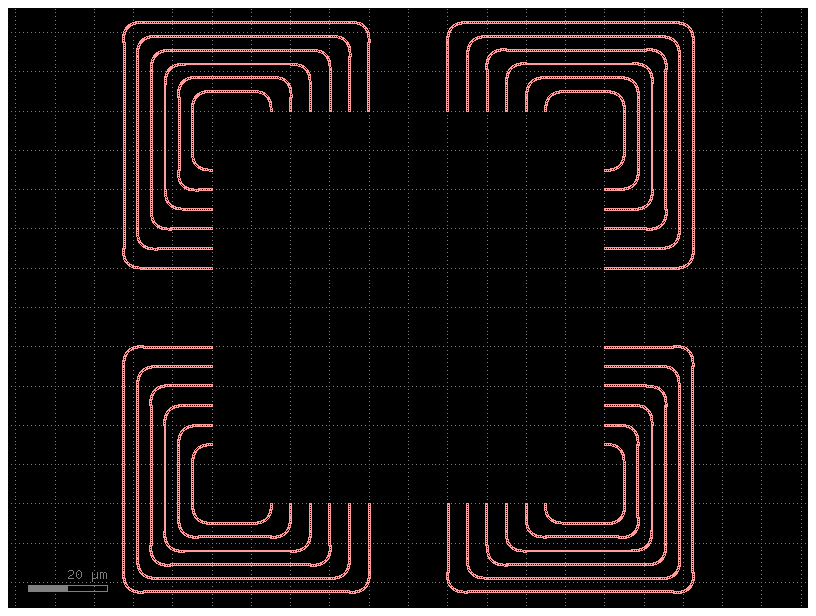

In [18]:
c = test_connect_corner(config="C")
c

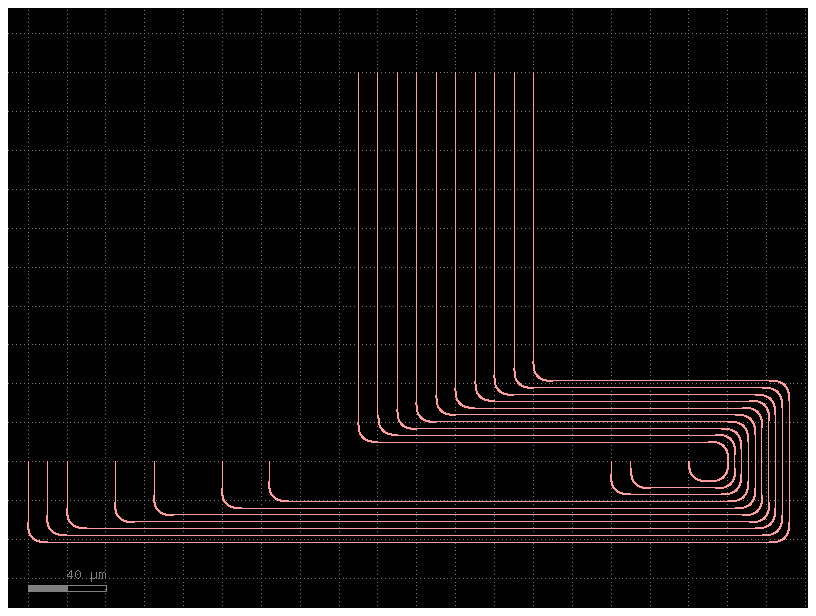

In [19]:
@gf.cell(cache={})
def test_connect_bundle_udirect(dy=200, orientation=270, layer=1):
    xs1 = [-100, -90, -80, -55, -35, 24, 0] + [200, 210, 240]
    axis = "X" if orientation in [0, 180] else "Y"
    pitch = 10.0
    N = len(xs1)
    xs2 = [70 + i * pitch for i in range(N)]

    if axis == "X":
        ports1 = [
            Port(
                f"top_{i}",
                center=(0, xs1[i]),
                width=0.5,
                orientation=orientation,
                layer=layer,
            )
            for i in range(N)
        ]

        ports2 = [
            Port(
                f"bottom_{i}",
                center=(dy, xs2[i]),
                width=0.5,
                orientation=orientation,
                layer=layer,
            )
            for i in range(N)
        ]

    else:
        ports1 = [
            Port(
                f"top_{i}",
                center=(xs1[i], 0),
                width=0.5,
                orientation=orientation,
                layer=layer,
            )
            for i in range(N)
        ]

        ports2 = [
            Port(
                f"bottom_{i}",
                center=(xs2[i], dy),
                width=0.5,
                orientation=orientation,
                layer=layer,
            )
            for i in range(N)
        ]

    c = Component()
    gf.routing.route_bundle(c, ports1, ports2, radius=10.0, sort_ports=True, cross_section=gf.cross_section.strip)
    return c


c = test_connect_bundle_udirect()
c

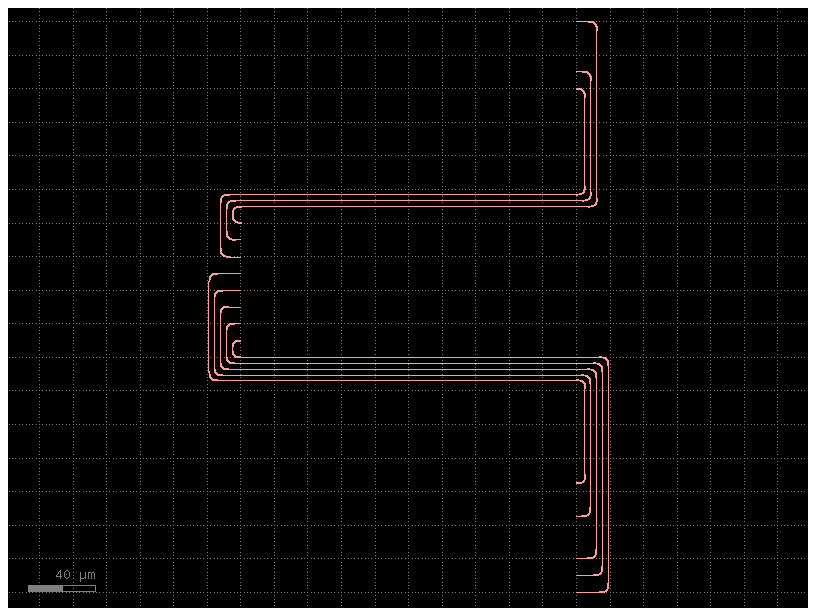

In [20]:
@gf.cell
def test_connect_bundle_u_indirect(dy=-200, orientation=180, layer=1):
    xs1 = [-100, -90, -80, -55, -35] + [200, 210, 240]
    axis = "X" if orientation in [0, 180] else "Y"
    pitch = 10.0
    N = len(xs1)
    xs2 = [50 + i * pitch for i in range(N)]

    a1 = orientation
    a2 = a1 + 180

    if axis == "X":
        ports1 = [
            Port(f"top_{i}", center=(0, xs1[i]), width=0.5, orientation=a1, layer=layer)
            for i in range(N)
        ]

        ports2 = [
            Port(
                f"bot_{i}",
                center=(dy, xs2[i]),
                width=0.5,
                orientation=a2,
                layer=layer,
            )
            for i in range(N)
        ]

    else:
        ports1 = [
            Port(f"top_{i}", center=(xs1[i], 0), width=0.5, orientation=a1, layer=layer)
            for i in range(N)
        ]

        ports2 = [
            Port(
                f"bot_{i}",
                center=(xs2[i], dy),
                width=0.5,
                orientation=a2,
                layer=layer,
            )
            for i in range(N)
        ]

    c = Component()
    gf.routing.route_bundle(
        c,
        ports1,
        ports2,
        bend=gf.components.bend_euler,
        radius=5,
        cross_section=gf.cross_section.strip,
    )

    return c


c = test_connect_bundle_u_indirect(orientation=0)
c

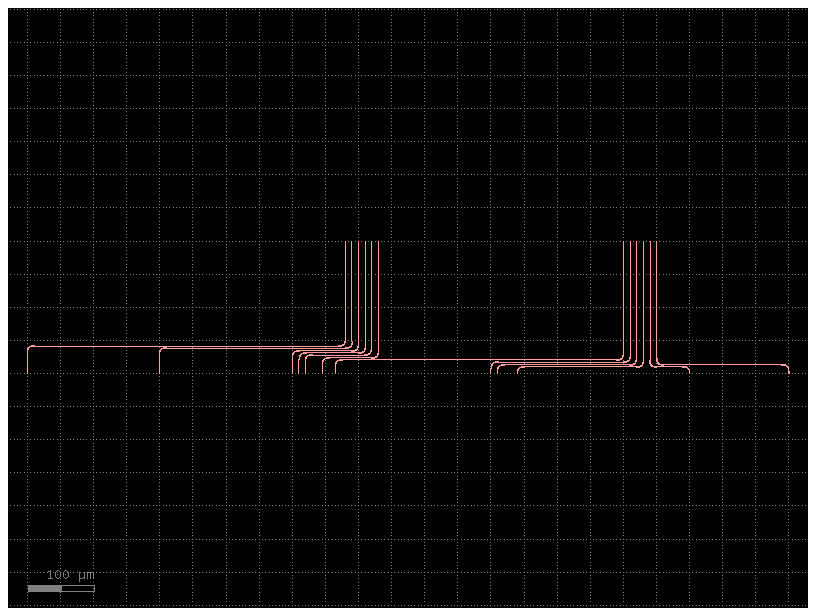

In [22]:
@gf.cell
def test_north_to_south(layer=1):
    dy = 200.0
    xs1 = [-500, -300, -100, -90, -80, -55, -35, 200, 210, 240, 500, 650]

    pitch = 10.0
    N = len(xs1)
    xs2 = [-20 + i * pitch for i in range(N // 2)]
    xs2 += [400 + i * pitch for i in range(N // 2)]

    a1 = 90
    a2 = a1 + 180

    ports1 = [
        gf.Port(f"top_{i}", center=(xs1[i], 0), width=0.5, orientation=a1, layer=layer)
        for i in range(N)
    ]

    ports2 = [
        gf.Port(f"bot_{i}", center=(xs2[i], dy), width=0.5, orientation=a2, layer=layer)
        for i in range(N)
    ]

    c = gf.Component()
    gf.routing.route_bundle(c, ports1, ports2, cross_section=gf.cross_section.strip)
    return c


c = test_north_to_south()
c

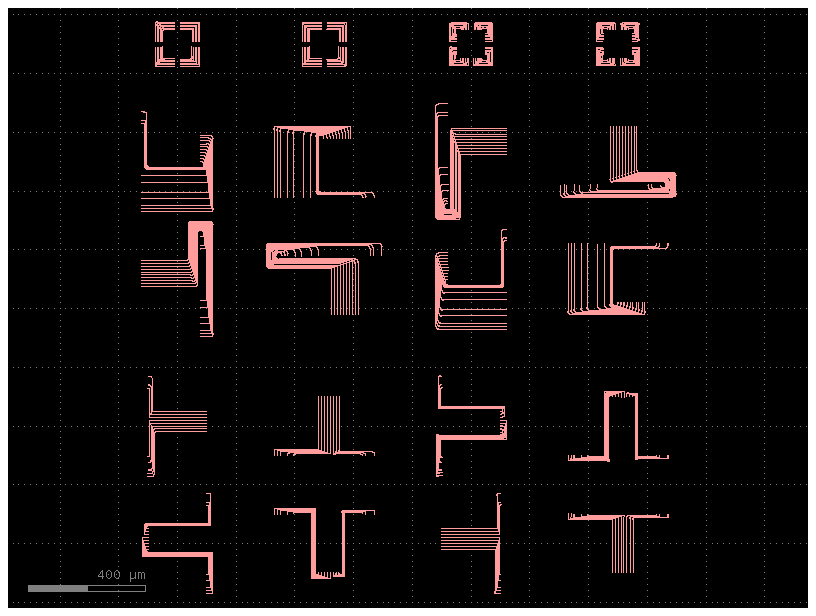

In [23]:
@gf.cell
def demo_connect_bundle():
    """Combines all the connect_bundle tests."""
    y = 400.0
    x = 500
    y0 = 900
    dy = 200.0
    c = gf.Component()
    for j, s in enumerate([-1, 1]):
        for i, orientation in enumerate([0, 90, 180, 270]):
            ref = c << test_connect_bundle_u_indirect(
                dy=s * dy, orientation=orientation
            )
            ref.dcenter = (i * x, j * y)

            ref = c << test_connect_bundle_udirect(dy=s * dy, orientation=orientation)
            ref.dcenter = (i * x, j * y + y0)

    for i, config in enumerate(["A", "B", "C", "D"]):
        ref = c << test_connect_corner(config=config)
        ref.dcenter = (i * x, 1700)

    return c


c = demo_connect_bundle()
c.show()
c

In [24]:
import gdsfactory as gf

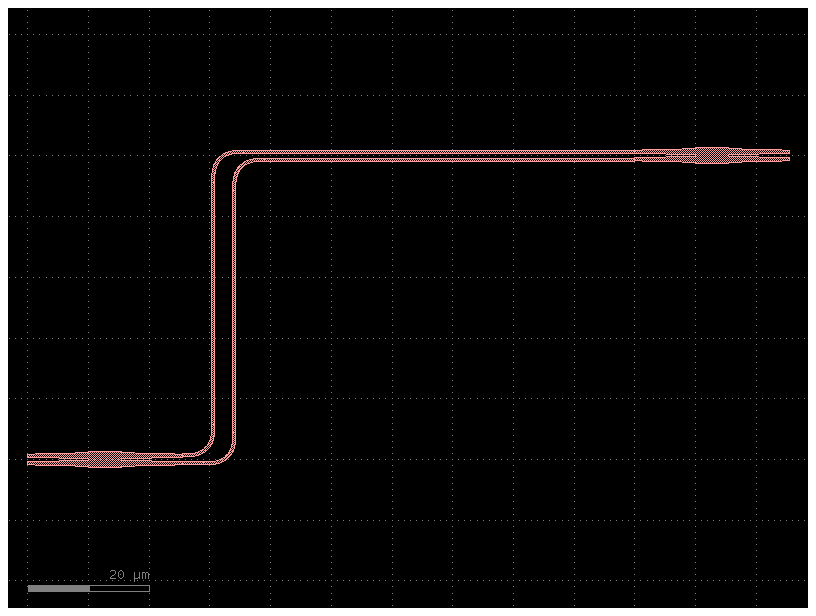

In [25]:
c = gf.Component()
c1 = c << gf.components.mmi2x2()
c2 = c << gf.components.mmi2x2()

c2.dmove((100, 50))
routes = gf.routing.route_bundle(
    c, [c1.ports["o4"], c1.ports["o3"]], [c2.ports["o1"], c2.ports["o2"]], radius=5, cross_section=gf.cross_section.strip
)
c

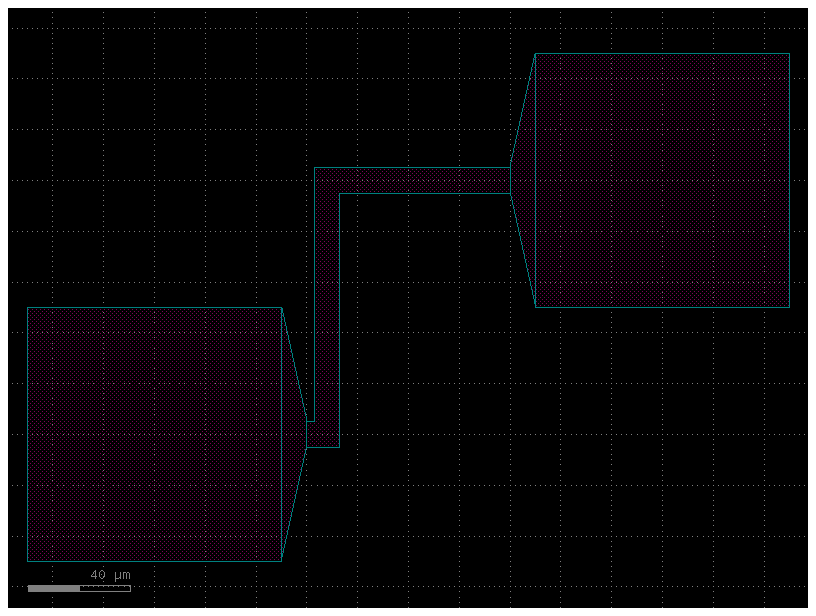

In [34]:
c = gf.Component()
c1 = c << gf.components.pad()
c2 = c << gf.components.pad()
c2.move((200, 100))
routes = gf.routing.route_bundle_electrical(
    c,
    [c1.ports["e3"]],
    [c2.ports["e1"]],
    cross_section=gf.cross_section.metal3,
)
c

**Problem**

Sometimes 90 degrees routes do not have enough space for a Manhattan route

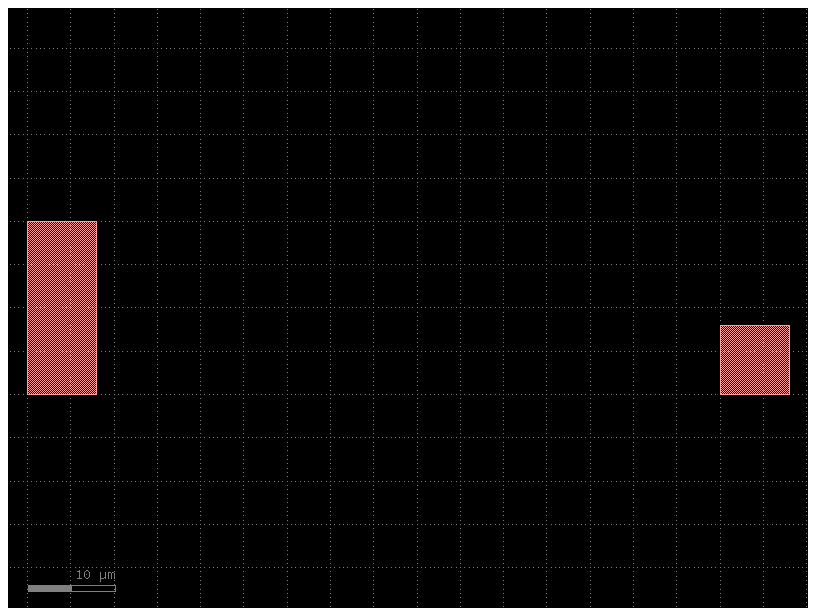

In [35]:
c = gf.Component()
c1 = c << gf.components.nxn(east=3, ysize=20)
c2 = c << gf.components.nxn(west=3)
c2.dmove((80, 0))
c

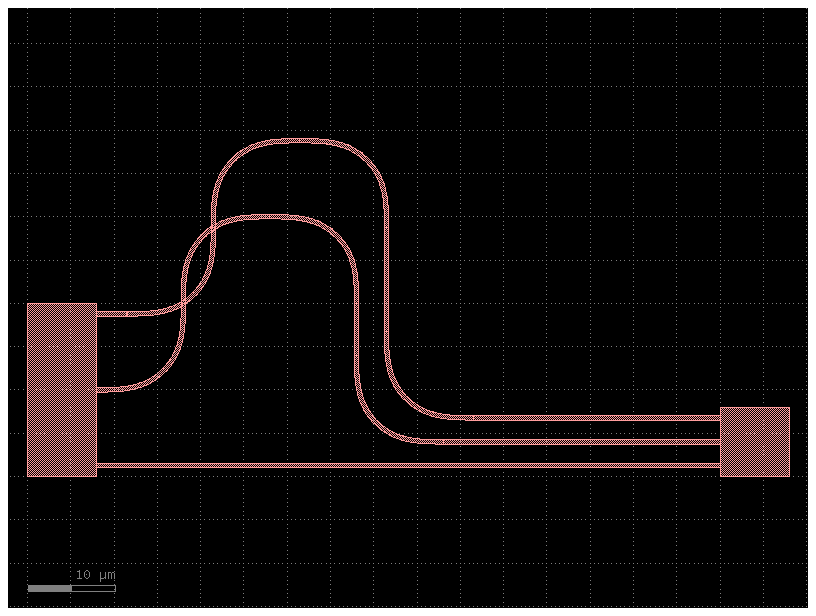

In [38]:
c = gf.Component()
c1 = c << gf.components.nxn(east=3, ysize=20)
c2 = c << gf.components.nxn(west=3)
c2.dmove((80, 0))
routes = gf.routing.route_bundle(
    c,
    list(c1.ports.filter(orientation=0)),
    list(c2.ports.filter(orientation=180)),
    on_collision=None,
    cross_section=gf.cross_section.strip,
)
c

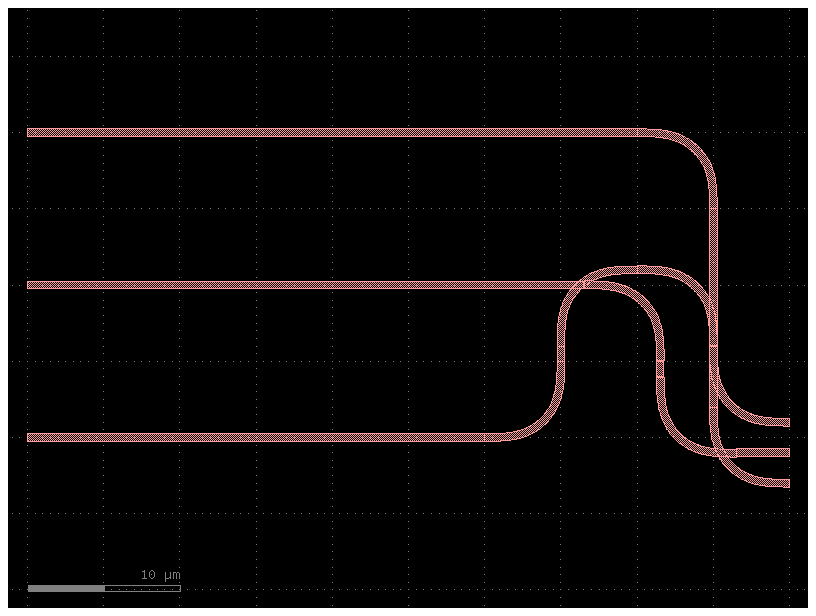

In [41]:
c = gf.Component()
pitch = 2.0
ys_left = [0, 10, 20]
N = len(ys_left)
ys_right = [(i - N / 2) * pitch for i in range(N)]
layer = 1

right_ports = [
    gf.Port(f"R_{i}", center=(0, ys_right[i]), width=0.5, orientation=180, layer=layer)
    for i in range(N)
]
left_ports = [
    gf.Port(f"L_{i}", center=(-50, ys_left[i]), width=0.5, orientation=0, layer=layer)
    for i in range(N)
]
left_ports.reverse()
routes = gf.routing.route_bundle(
    c, right_ports, left_ports, radius=5, on_collision=None, cross_section=gf.cross_section.strip
)

c

**Solution**

Add Sbend routes using `route_bundle_sbend`

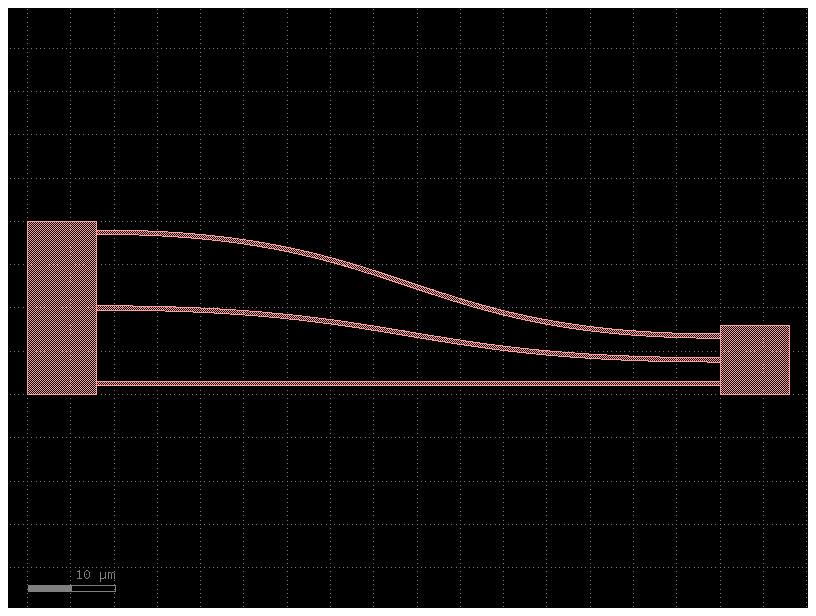

In [42]:
c = gf.Component()
c1 = c << gf.components.nxn(east=3, ysize=20)
c2 = c << gf.components.nxn(west=3)
c2.dmove((80, 0))
routes = gf.routing.route_bundle_sbend(
    c,
    c1.ports.filter(orientation=0),
    c2.ports.filter(orientation=180),
    enforce_port_ordering=False,
)
c

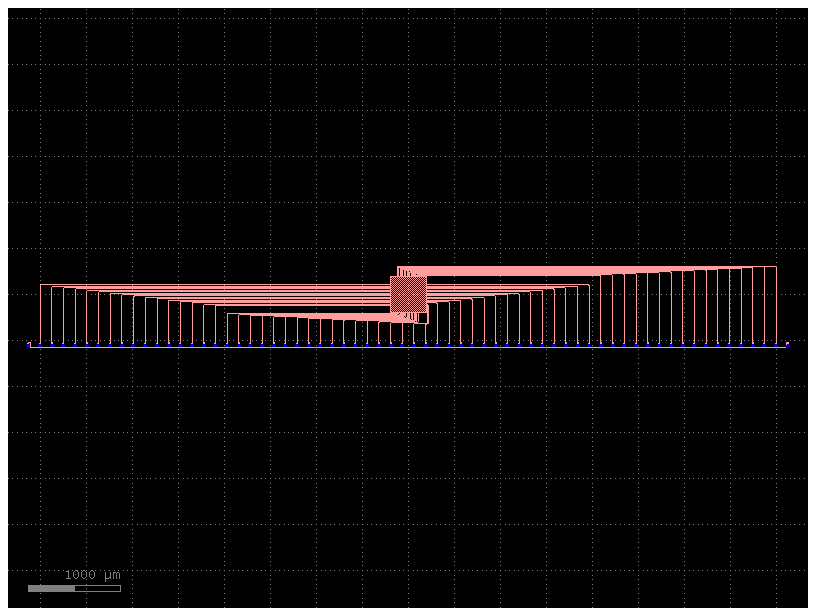

In [43]:
import gdsfactory as gf
from gdsfactory.samples.big_device import big_device

c = gf.Component()
c1 = big_device()
c2 = gf.routing.add_fiber_array(c1)
c2.plot()

## Collision

You can navigate around bounding boxes when routing if you pass the bboxes of all the objects that you want to avoid.

Currently the router only respects any (merged) bounding boxes which overlap with start or end port bundles

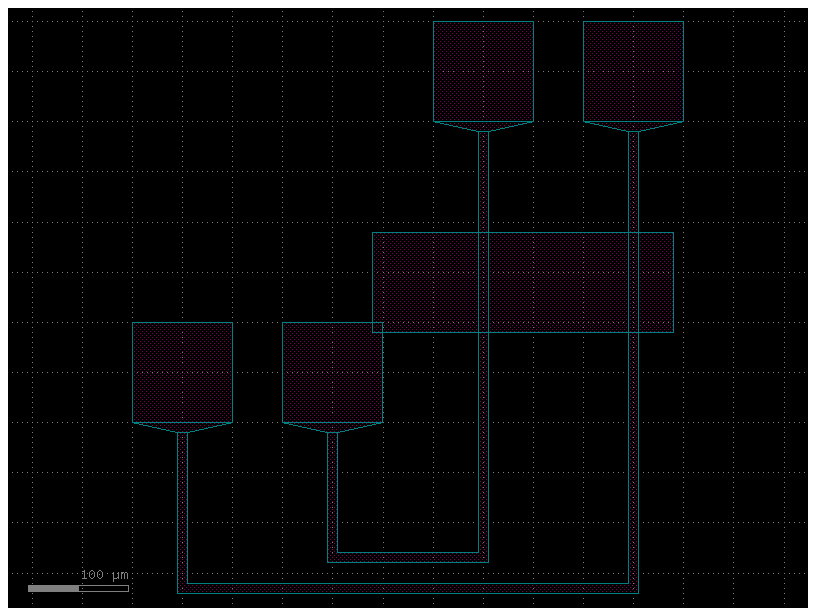

In [45]:
import gdsfactory as gf

c = gf.Component()
columns = 2
ptop = c << gf.components.pad_array(columns=columns, port_orientation=270)
pbot = c << gf.components.pad_array(port_orientation=270, columns=columns)
ptop.dmovex(300)
ptop.dmovey(300)

obstacle = c << gf.c.rectangle(size=(300, 100), layer="M3")
obstacle.dymin = pbot.dymax - 10
obstacle.dxmin = pbot.dxmax - 10


routes = gf.routing.route_bundle_electrical(
    c,
    pbot.ports,
    ptop.ports,
    start_straight_length=100,
    separation=20,
    bboxes=[
        obstacle.bbox(),
        pbot.bbox(),
        ptop.bbox(),
    ],  # obstacles to avoid
    sort_ports=True,
    cross_section=gf.cross_section.metal3,
)

c

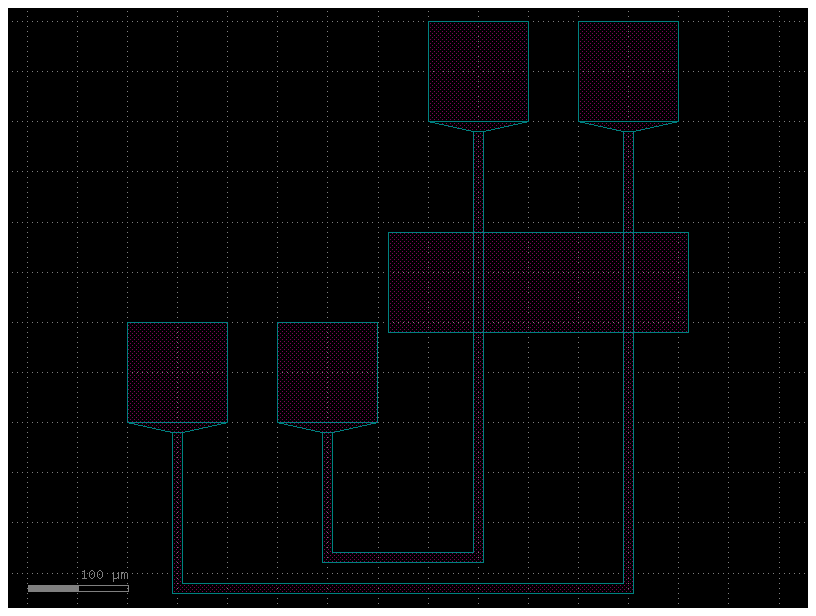

In [46]:
import gdsfactory as gf

c = gf.Component()
columns = 2
ptop = c << gf.components.pad_array(columns=columns, port_orientation=270)
pbot = c << gf.components.pad_array(port_orientation=270, columns=columns)
ptop.dmovex(300)
ptop.dmovey(300)

obstacle = c << gf.c.rectangle(size=(300, 100), layer="M3", centered=True)
obstacle.dymin = pbot.dymax - 10
obstacle.dxmin = pbot.dxmax + 10

c2 = gf.Component()  # create a dummy component to get the size of the obstacle
obstacle_sized = c2 << gf.c.rectangle(size=(340, 140), layer="M3", centered=True)
obstacle_sized.dcenter = obstacle.dcenter


routes = gf.routing.route_bundle_electrical(
    c,
    pbot.ports,
    ptop.ports,
    start_straight_length=100,
    separation=20,
    bboxes=[
        obstacle_sized.bbox(),
        pbot.bbox(),
        ptop.bbox(),
    ],  # obstacles to avoid
    sort_ports=True,
    cross_section=gf.cross_section.metal3,
)

c

## route_bundle_all_angle

You can also route using diagonal routes.

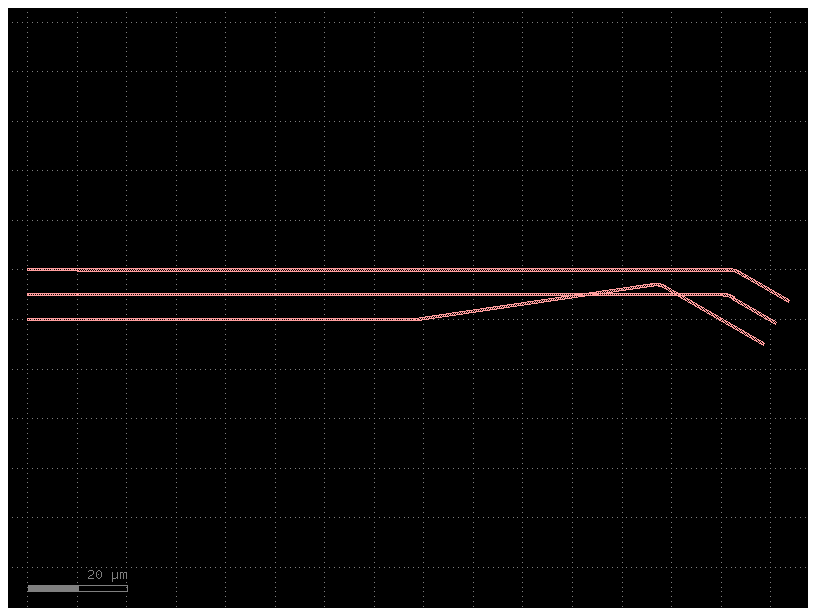

In [50]:
import gdsfactory as gf

c = gf.Component()
rows = 3
straight = gf.c.straight
w1 = c << gf.c.array(straight, row_pitch=5, column_pitch=10, rows=rows, columns=1)
w2 = c << gf.c.array(straight, row_pitch=5, column_pitch=10, rows=rows, columns=1)
w2.drotate(-30)
w2.dmovex(140)
p1 = list(w1.ports.filter(orientation=0))
p2 = list(w2.ports.filter(orientation=150))
p1.reverse()
p2.reverse()

gf.routing.route_bundle_all_angle(
    c,
    p1,
    p2,
    separation=3,
    cross_section=gf.cross_section.strip,
)
c

You can also use it to connect rotated components that do not have a manhattan orientation (0, 90, 180, 270)

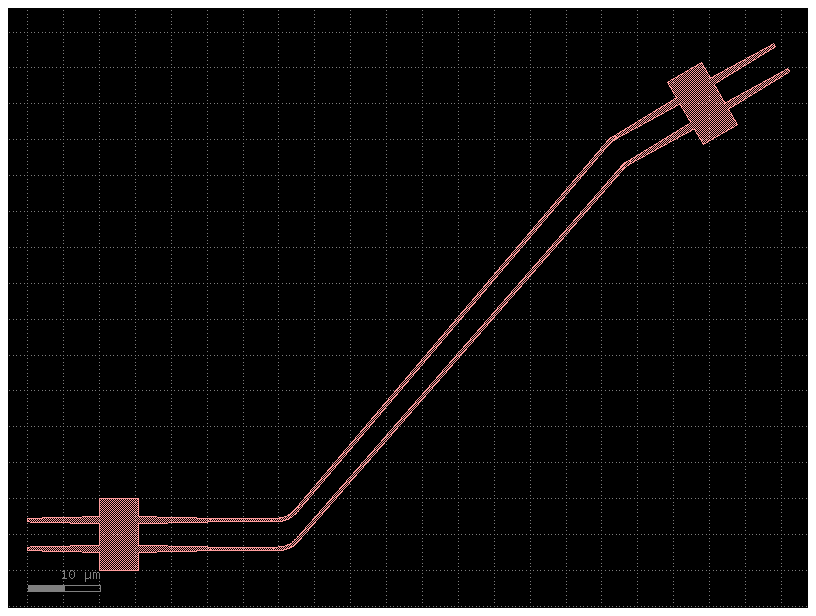

In [51]:
c = gf.Component()

mmi = gf.components.mmi2x2(width_mmi=10, gap_mmi=3)
mmi1 = c.create_vinst(mmi)  # create a virtual instance
mmi2 = c.create_vinst(mmi)  # create a virtual instance

mmi2.dmove((100, 10))
mmi2.drotate(30)

routes = gf.routing.route_bundle_all_angle(
    c,
    mmi1.ports.filter(orientation=0),
    [mmi2.ports["o2"], mmi2.ports["o1"]],
    cross_section=gf.cross_section.strip,
)
c.show()
c